# 📊 Customer Churn Analysis Project
---

## 🔹 1️⃣ Business Understanding
---

### 🎯 Objective
* Understand the key factors driving customer churn.
* Provide actionable insights and recommendations to stakeholders.

## 🔹 2️⃣ Data Overview
---

### 📌 Dataset Information

In [1]:
#Call libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ==========================================
# 1) Load Data
# ==========================================

In [2]:
file_path = "D:\\Digilians_Data_Analysis\\Data_maining\\Assignments\\WA_Fn-UseC_-Telco-Customer-Churn - WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(file_path)

In [3]:
#DATA SHAPE
print("----------------------DATA SHAPE------------------")
df.shape


----------------------DATA SHAPE------------------


(7043, 21)

In [7]:
#DATA HEAD
print("---------------------DATA HEAD--------------------")
df.head()


---------------------DATA HEAD--------------------


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
#DATA INFO
print("----------------DATA INFO------------------")
df.info()

----------------DATA INFO------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16

In [5]:
#MISSING VALUES CHECKS
print("-------------------MISSING VALUES---------------")
df.isna().sum().sort_values(ascending=False)

-------------------MISSING VALUES---------------


TotalCharges        11
gender               0
SeniorCitizen        0
Partner              0
customerID           0
Dependents           0
tenure               0
MultipleLines        0
PhoneService         0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
InternetService      0
TechSupport          0
StreamingTV          0
Contract             0
StreamingMovies      0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
Churn                0
dtype: int64

In [5]:
#Edit Errors
df['TotalCharges'] = df['TotalCharges'].fillna(0)
df['SeniorCitizen']=df['SeniorCitizen'].astype(bool)

In [7]:
#MISSING VALUES CHECKS
print("-------------------MISSING VALUES---------------")
df.isna().sum().sort_values(ascending=False)

-------------------MISSING VALUES---------------


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
#DATA INFO
print("----------------DATA INFO------------------")
df.info()

----------------DATA INFO------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   bool   
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16

now as a task i must define the coulms

1-customerID: Unique identifier for each customer

2-gender: Gender of the customer (male/female)

3-SeniorCitizen: Indicates if the customer is a senior citizen (1) or not (0)

4-Partner: Indicates if the customer has a partner (Yes/No)

5-Dependents: Indicates if the customer has dependents (Yes/No)

6-tenure: Number of months the customer has been with the company

7-PhoneService: Indicates if the customer has phone service (Yes/No)

8-MultipleLines: Indicates if the customer has multiple phone lines (Yes/No/No phone service)

9-InternetService: Type of internet service (DSL/Fiber optic/No)

10-OnlineSecurit: Indicates if the customer has online security service (Yes/No/No internet service)

11-OnlineBackup: Indicates if the customer has online backup service (Yes/No/No internet service)

12-DeviceProtection: Indicates if the customer has device protection service (Yes/No/No internet service)

13-TechSupport: Indicates if the customer has tech support service (Yes/No/No internet service)

14-StreamingTV: Indicates if the customer has streaming TV service (Yes/No/No internet service)

15-StreamingMovies: Indicates if the customer has streaming movies service (Yes/No/No internet service)

16-Contract: Type of customer contract (Month-to-month/One year/Two year)

17-PaperlessBilling: Indicates if the customer uses paperless billing (Yes/No)

18-PaymentMethod: Customer's payment method (Electronic check/Mailed check/Bank transfer/Credit card)

19-MonthlyCharges: The amount charged to the customer monthly

20-TotalCharges: The total amount charged to the customer

21-Churn: Indicates if the customer has churned (Yes/No)

In [7]:
#DATA DESCRIBE
print("---------------DATA DESCRIBE---------------")
df.describe()

---------------DATA DESCRIBE---------------


,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304
std,24.559481,30.090047,2266.794470
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


# ==========================================
# 2) Quality checks: duplicates, missingness, invalid values
# ==========================================

In [8]:
#DUPLICATES CHECKS
print("------------Full-row duplicate count--------------")
df.duplicated().sum()

------------Full-row duplicate count--------------


np.int64(0)

In [11]:
#MISSING VALUES CHECKS
print("-------------------MISSING VALUES---------------")
df.isna().sum().sort_values(ascending=False)

-------------------MISSING VALUES---------------


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# ==========================================
# 3) Univariate analysis
# ==========================================

----------------Categorical Variable Churn-----------------


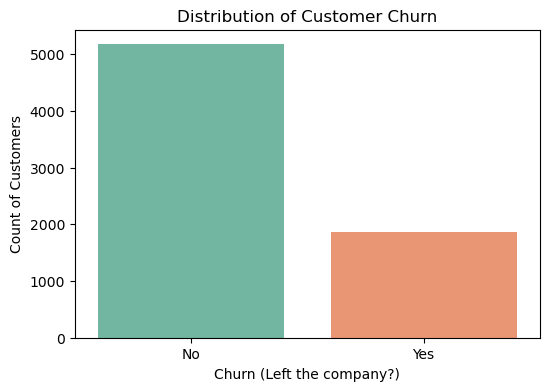


--- Churn Percentage ---
Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


In [10]:
print("----------------Categorical Variable Churn-----------------")
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Churn', hue='Churn', palette='Set2') 
plt.title('Distribution of Customer Churn')
plt.xlabel('Churn (Left the company?)')
plt.ylabel('Count of Customers')
plt.show()
print("\n--- Churn Percentage ---")
print(df['Churn'].value_counts(normalize=True) * 100)

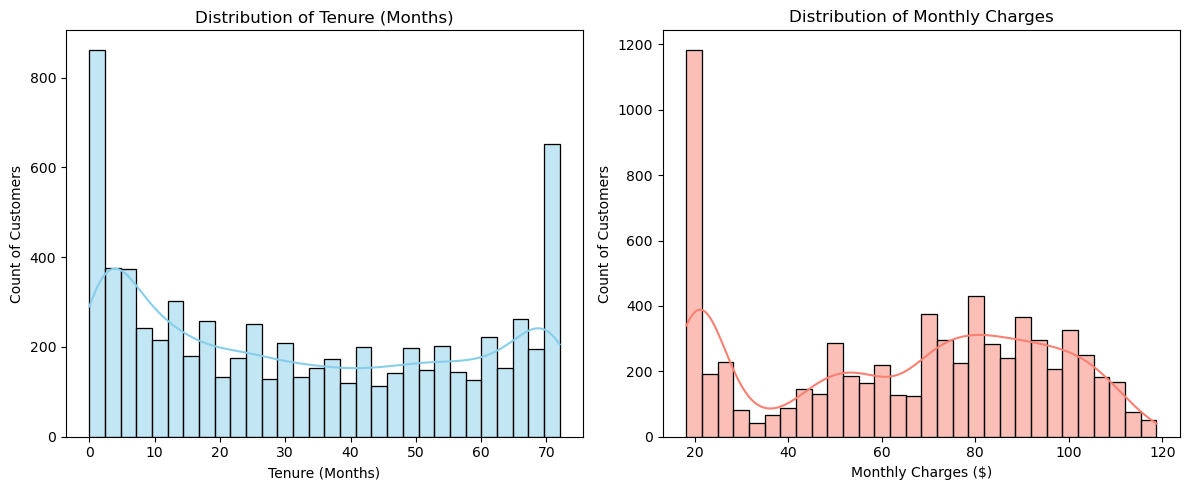

In [11]:
#NUMERICl VARIABLES
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['tenure'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Tenure (Months)')
plt.xlabel('Tenure (Months)')
plt.ylabel('Count of Customers')
plt.subplot(1, 2, 2)
sns.histplot(df['MonthlyCharges'], bins=30, kde=True, color='salmon')
plt.title('Distribution of Monthly Charges')
plt.xlabel('Monthly Charges ($)')
plt.ylabel('Count of Customers')
plt.tight_layout()
plt.show()

# ==========================================
# 4) Bivariate Analysis
# ==========================================

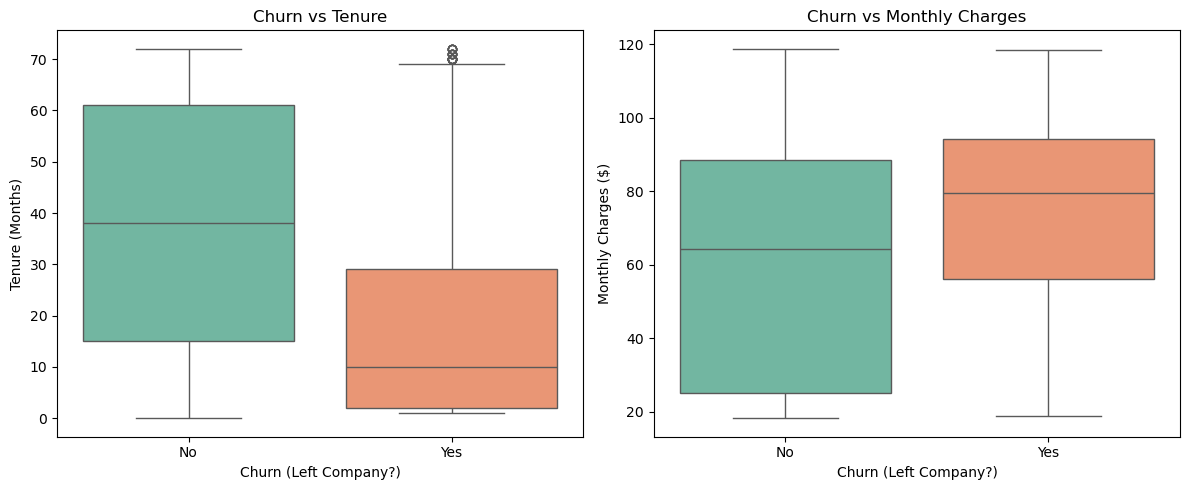

In [12]:
# CHURN VS NUMERICAL VARIABLES
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='Churn', y='tenure', hue='Churn', palette='Set2', legend=False)
plt.title('Churn vs Tenure')
plt.xlabel('Churn (Left Company?)')
plt.ylabel('Tenure (Months)')
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='Churn', y='MonthlyCharges', hue='Churn', palette='Set2', legend=False)
plt.title('Churn vs Monthly Charges')
plt.xlabel('Churn (Left Company?)')
plt.ylabel('Monthly Charges ($)')
plt.tight_layout()
plt.show()

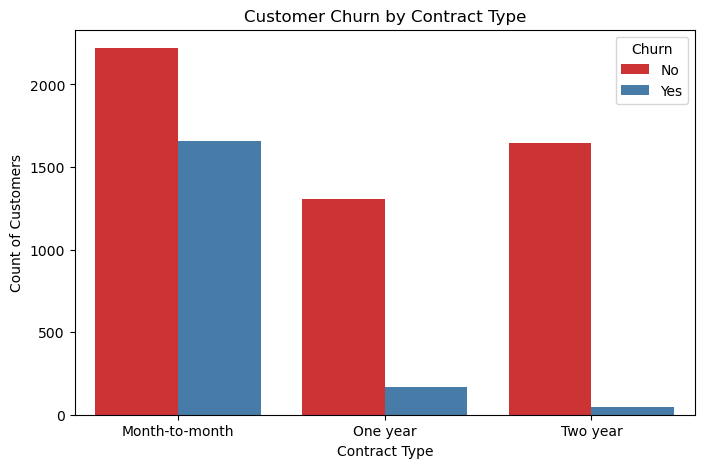

In [13]:
#CATEGORICAL VS CATEGORICAL
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Contract', hue='Churn', palette='Set1')
plt.title('Customer Churn by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Count of Customers')
plt.show()

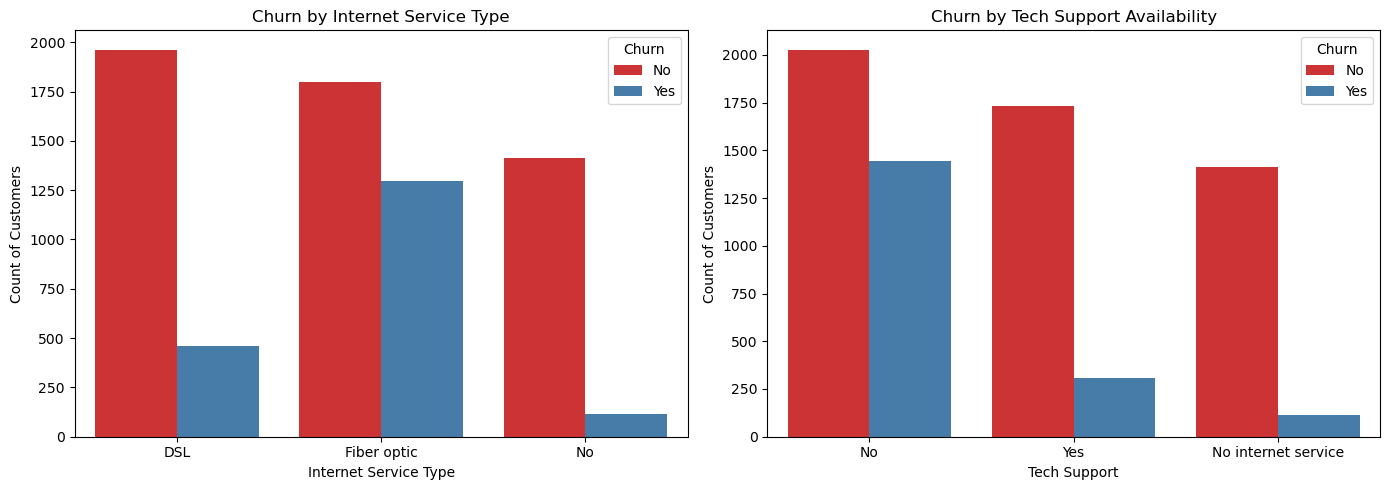

In [17]:
#INTERNET SERVICE & TECH SUPPORT
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='InternetService', hue='Churn', palette='Set1')
plt.title('Churn by Internet Service Type')
plt.xlabel('Internet Service Type')
plt.ylabel('Count of Customers')
plt.subplot(1, 2, 2)
sns.countplot(data=df, x='TechSupport', hue='Churn', palette='Set1')
plt.title('Churn by Tech Support Availability')
plt.xlabel('Tech Support')
plt.ylabel('Count of Customers')
plt.tight_layout()
plt.show()

# ==========================================
# 5) Correlation Heatmap
# ==========================================

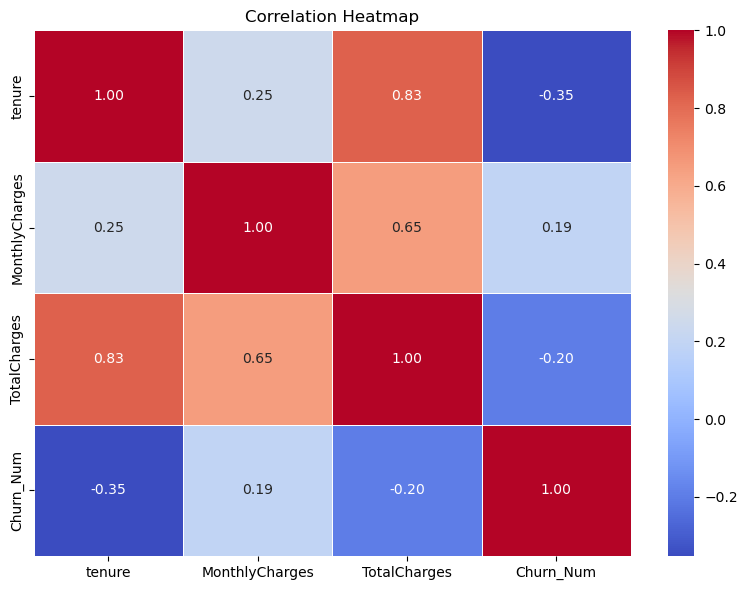

In [14]:
#HEATMAP CHART
df_corr = df[['tenure', 'MonthlyCharges', 'TotalCharges']].copy()
df_corr['Churn_Num'] = df['Churn'].map({'Yes': 1, 'No': 0})
corr_matrix = df_corr.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

📊 Final Report Customer Churn Analysis
1. Executive Summary
Our data analysis reveals an overall customer churn rate of 26.5% By cross-examining multiple variables, we identified that the highest risk of attrition is heavily concentrated among new customers those on month-to-month contracts, and Fiber Optic internet users who lack technical support

2. Key Data Insights
The High-Risk Profile Tenure & Cost

The correlation heatmap and boxplots highlight a significant negative correlation -0.35 between customer tenure and churn Customers who leave typically have a median tenure of just 10 months whereas retained customers average around 38 months

Churned customers generally pay higher monthly fees median ~$80 compared to retained customers median ~$65 Takeaway New customers paying premium prices are the most vulnerable to churning

The Month-to-Month Contract Trap

The contract type analysis clearly shows that the vast majority of leaving customers are on Month-to-month plan Conversely customers locked into 1-year or 2-year contracts show exceptionally low churn rates providing massive revenue stability

The Fiber Optic & Tech Support Paradox

Despite being a premium high-speed service Fiber Optic accounts for the highest volume of churned customers compared to standard DSL
When mapped against Tech Support the data reveals a critical gap the absence of technical support is a primary driver of cancellations Customers paying for expensive Fiber Optic without access to tech support are leaving at alarming rates

3. Strategic Recommendations
Contract Conversion Campaigns: Launch targeted retention campaigns such as loyalty discounts or free service upgrades specifically aimed at converting Month-to-month subscribers into 1-year annual contracts to stabilize Monthly Recurring Revenue MRR

Bundle Free Tech Support Integrate Tech Support automatically and free of charge into all premium Fiber Optic plans The data strongly suggests that tech support acts as a powerful retention shield against churn

Focus on the First 12 Months Develop a robust customer onboarding program dedicated to ensuring high satisfaction during the first year of service Since churn drops drastically after the 12-month mark surviving this initial period is crucial for increasing Customer Lifetime Value CLV